<a href="https://colab.research.google.com/github/YunhuiDong/olist-delivery-satisfaction-team18/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup and Data Overview

- Clone from github for version control and data access
- Import necessary libraries for analysis
- Load data and perform an initial inspection to understand the data.

In [80]:
# Clone from github for version control and data access
import os

repo_url = "https://github.com/YunhuiDong/olist-delivery-satisfaction-team18.git"
repo_name = "olist-delivery-satisfaction-team18"

if not os.path.exists(repo_name):
    !git clone {repo_url}
else:
    print(f"✅ Repo '{repo_name}' already exists.")
%cd {repo_name}
!git pull

Cloning into 'olist-delivery-satisfaction-team18'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 48 (delta 17), reused 2 (delta 0), pack-reused 17 (from 2)
Receiving objects: 100% (48/48), 43.12 MiB | 5.07 MiB/s, done.
Resolving deltas: 100% (17/17), done.
/Users/wanjiaruan/Desktop/USC/DSCI/550/Project/olist-delivery-satisfaction-team18-1/olist-delivery-satisfaction-team18/olist-delivery-satisfaction-team18
Already up to date.


In [81]:
# Import necessary libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [82]:
# Load data
customer = pd.read_csv('Original Data/olist_customers_dataset.csv')
seller = pd.read_csv('Original Data/olist_sellers_dataset.csv')
geo = pd.read_csv('Original Data/olist_geolocation_dataset.csv')
order = pd.read_csv('Original Data/olist_orders_dataset.csv')
order_items = pd.read_csv('Original Data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('Original Data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('Original Data/olist_order_reviews_dataset.csv')
products = pd.read_csv('Original Data/olist_products_dataset.csv')
product_category = pd.read_csv('Original Data/product_category_name_translation.csv')

In [83]:
# Perform an initial inspection to understand the data.
def summarize_dataset(df, name):
    print(f"\n === {name} Dataset Summary ===")
    print(f"Shape: {df.shape}")
    print("\nMissing Values (%):")
    print(round(df.isnull().sum() / len(df) * 100, 2))
    print("\nDuplicate Rows:")
    print(df.duplicated().sum())
    print("\nData Types:")
    print(df.dtypes)
    print("\nSample Rows:")
    display(df.head())

# Summarize each dataset
datasets = {
    "Customer": customer,
    "Seller": seller,
    "Geolocation": geo,
    "Order": order,
    "Order Items": order_items,
    "Order Payments": order_payments,
    "Order Reviews": order_reviews,
    "Products": products,
    "Product Category": product_category
}

for name, df in datasets.items():
    summarize_dataset(df, name)


 === Customer Dataset Summary ===
Shape: (99441, 5)

Missing Values (%):
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

Duplicate Rows:
0

Data Types:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Sample Rows:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



 === Seller Dataset Summary ===
Shape: (3095, 4)

Missing Values (%):
seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

Duplicate Rows:
0

Data Types:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

Sample Rows:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



 === Geolocation Dataset Summary ===
Shape: (1000163, 5)

Missing Values (%):
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

Duplicate Rows:
261831

Data Types:
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Sample Rows:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



 === Order Dataset Summary ===
Shape: (99441, 8)

Missing Values (%):
order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.16
order_delivered_carrier_date     1.79
order_delivered_customer_date    2.98
order_estimated_delivery_date    0.00
dtype: float64

Duplicate Rows:
0

Data Types:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Sample Rows:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



 === Order Items Dataset Summary ===
Shape: (112650, 7)

Missing Values (%):
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

Duplicate Rows:
0

Data Types:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Sample Rows:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



 === Order Payments Dataset Summary ===
Shape: (103886, 5)

Missing Values (%):
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

Duplicate Rows:
0

Data Types:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

Sample Rows:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



 === Order Reviews Dataset Summary ===
Shape: (99224, 7)

Missing Values (%):
review_id                   0.00
order_id                    0.00
review_score                0.00
review_comment_title       88.34
review_comment_message     58.70
review_creation_date        0.00
review_answer_timestamp     0.00
dtype: float64

Duplicate Rows:
0

Data Types:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

Sample Rows:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



 === Products Dataset Summary ===
Shape: (32951, 9)

Missing Values (%):
product_id                    0.00
product_category_name         1.85
product_name_lenght           1.85
product_description_lenght    1.85
product_photos_qty            1.85
product_weight_g              0.01
product_length_cm             0.01
product_height_cm             0.01
product_width_cm              0.01
dtype: float64

Duplicate Rows:
0

Data Types:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Sample Rows:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



 === Product Category Dataset Summary ===
Shape: (71, 2)

Missing Values (%):
product_category_name            0.0
product_category_name_english    0.0
dtype: float64

Duplicate Rows:
0

Data Types:
product_category_name            object
product_category_name_english    object
dtype: object

Sample Rows:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# 2. Data Cleaning and Preprocessing

- Handling duplicate and missing values.
- Standardzing time format
- Table-wise cleaning and aggregation, preparing key-features for analysis

In [84]:
# Standardization: Time Converter
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'])
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'])
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'])
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'])

# Standardization: Reindexing
order = order[order['order_status'] == 'delivered'].reset_index(drop=True)

# Missing Values: fill with values
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna('No Title')
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('No Comment')
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])

In [85]:
# Customer and Seller Cleaning
# Choose customer_unique_id as the unique identifier
customer['customer_unique_id'].nunique(), customer['customer_id'].nunique()

# Check the number of unique customer state and city
print('Customer State Distribution')
print(f'Unique number of customer state: ', customer.customer_state.nunique())
print(f'Unique number of customer cities: ', customer.customer_city.nunique())
print()

customer_state_pct = (customer['customer_state'].value_counts(normalize=True) * 100).round(2)
print(customer_state_pct.head(5))
print()

print('Seller State Distribution')
print(f'Unique number of sellers state: ', seller.seller_state.nunique())
print(f'Unique number of sellers cities: ', seller.seller_city.nunique())
print()

seller_state_pct = (seller['seller_state'].value_counts(normalize=True) * 100).round(2)
print(seller_state_pct.head(5))


Customer State Distribution
Unique number of customer state:  27
Unique number of customer cities:  4119

customer_state
SP    41.98
RJ    12.92
MG    11.70
RS     5.50
PR     5.07
Name: proportion, dtype: float64

Seller State Distribution
Unique number of sellers state:  23
Unique number of sellers cities:  611

seller_state
SP    59.74
PR    11.28
MG     7.88
SC     6.14
RJ     5.53
Name: proportion, dtype: float64


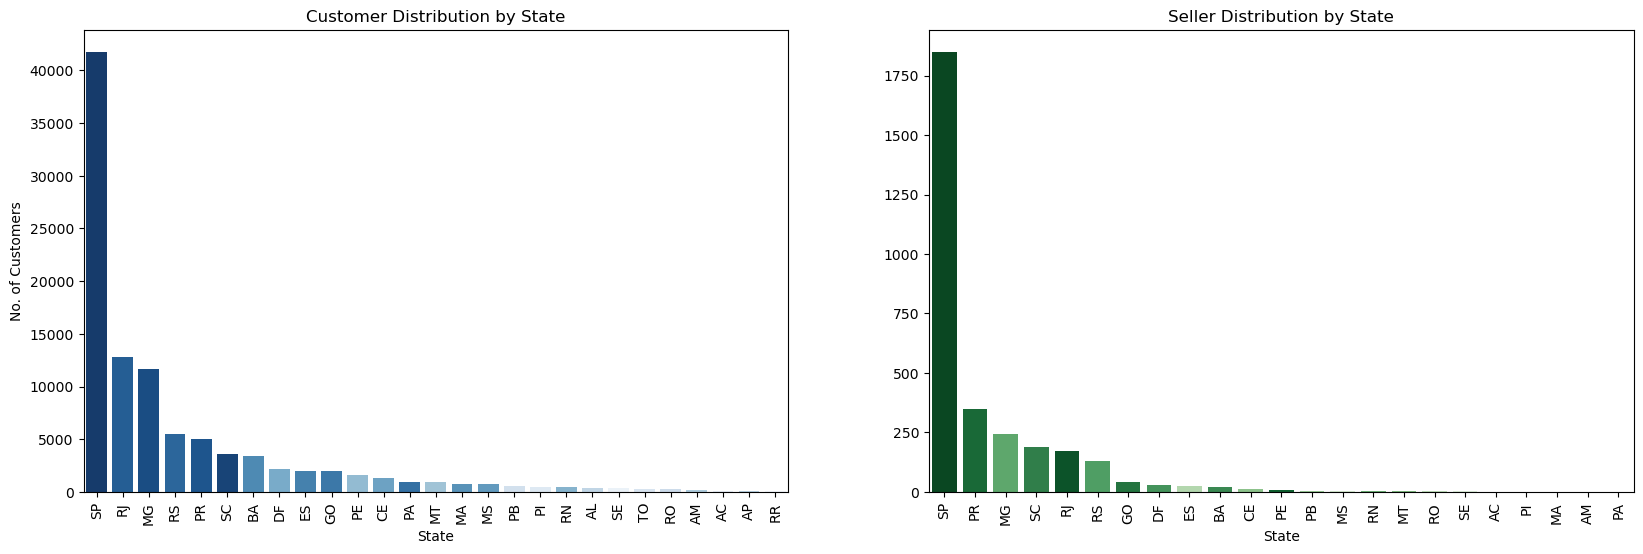

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(
    data=customer,
    x='customer_state',
    order=customer['customer_state'].value_counts().index,
    ax=axes[0],
    hue='customer_state',
    palette='Blues_r'
)
axes[0].set_xlabel('State')
axes[0].set_ylabel('No. of Customers')
axes[0].set_title('Customer Distribution by State')
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(
    data=seller,
    x='seller_state',
    order=seller['seller_state'].value_counts().index,
    ax=axes[1],
    hue='seller_state',
    palette='Greens_r'
)
axes[1].set_xlabel('State')
axes[1].set_ylabel('')
axes[1].set_title('Seller Distribution by State')
axes[1].tick_params(axis='x', rotation=90)

The plot and analysis shows that most customer and sellers are located in **São Paulo (SP)**, leading with ***41.98%*** of customer and ***59.74%*** of seller base. The secondary market concentrated in PR, RJ, and MG etc. Therefore, SP should be the primary focuse for futher analysis and business strategy.

In [87]:
# Geolocation Data Cleaning
check_multi_state = geo.groupby('geolocation_zip_code_prefix')['geolocation_state'].nunique().value_counts()
print(check_multi_state)

check_multi_city = geo.groupby('geolocation_zip_code_prefix')['geolocation_city'].nunique().value_counts()
print(check_multi_city)

geolocation_state
1    19007
2        8
Name: count, dtype: int64
geolocation_city
1    10459
2     8265
3      255
4       27
5        9
Name: count, dtype: int64


When examining the geolocation dataframe, we observe that each column represents a different level of geographic granularity. The sample rows above highlight a key issue — the same city and state can appear with multiple latitude, longitude, and ZIP code prefix values, reflecting Olist’s use of truncated (five-digit) postal codes.

For subsequent modeling and visualization, it is crucial to select an appropriate spatial resolution. Given that São Paulo (SP) dominates both the customer and seller base, relying solely on the state level would be overly coarse. Meanwhile, city-level aggregation, though intuitive, may overlook intra-city variation.

However, working at the ZIP-code-prefix level presents its own challenge: a single prefix can correspond to two or more neighboring cities due to the shortened format of postal codes. This overlap is not rare, but rather a structural characteristic of the dataset. Despite this ambiguity, the prefix level still provides the most geographically consistent and fine-grained approximation available, as latitude and longitude can be averaged to represent each region’s central location.

In summary, we will clean the geolocation dataframe by grouping on the zip_code_prefix column, taking the mean latitude and longitude for each prefix, and assigning the most frequently occurring city as its representative label — acknowledging that this approach balances precision and practicality.

In [88]:
geo_clean = (geo.groupby('geolocation_zip_code_prefix', as_index = False).agg(
    {
        'geolocation_lat': 'mean',
        'geolocation_lng':'mean',
        'geolocation_city': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
        'geolocation_state': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    })
)

In [89]:
# Drop the columns that are not needed as geolocation is cleaned
customer = customer.drop(columns=['customer_state', 'customer_unique_id', 'customer_city'])
seller = seller.drop(columns=['seller_state', 'seller_city'])

In [90]:
# Order Data Cleaning
order['delivery_days'] = (order['order_delivered_customer_date'] - order['order_purchase_timestamp']).dt.days
order['delay_days'] = (order['order_delivered_customer_date'] - order['order_estimated_delivery_date']).dt.days
order['is_late'] = (order['delay_days'] > 0).astype(int)

# remove orders that not yet delivered
order_clean = order[order['order_status'] == 'delivered'].dropna(subset=['order_delivered_customer_date'])


<Axes: xlabel='delay_days'>

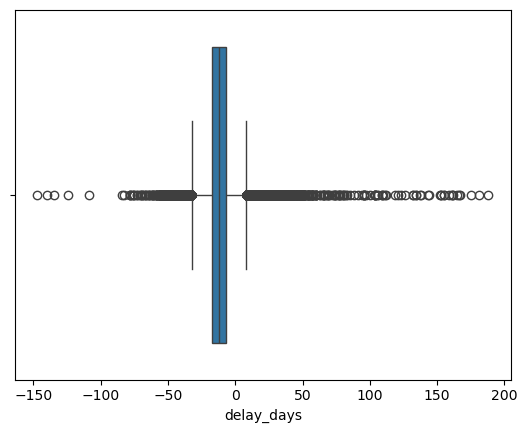

In [91]:
sns.boxplot(x=order_clean['delay_days'])

The boxplot reveals that delay_days contains severe outliers, ranging from 200 days late to 150 days early, indicating an extremely wide spread. The IQR shows that most values are concentrated around a narrow range of early or slightly delayed deliveries, while extreme values stretch the overall distribution.
Based on this observation and business assumptions, we constrained the range of valid delivery delays to between –50 and +60 days.
Additionally, upper and lower limits were refined using the quantile-based threshold to ensure that only the top and bottom 1% of extreme cases were removed.

In [92]:
order_clean = order_clean[order_clean['delay_days'].between(-50, 60)]
order_clean = order_clean[order_clean['delay_days'].between(order_clean['delay_days'].quantile(0.01), order_clean['delay_days'].quantile(0.99))]

<Axes: xlabel='delay_days'>

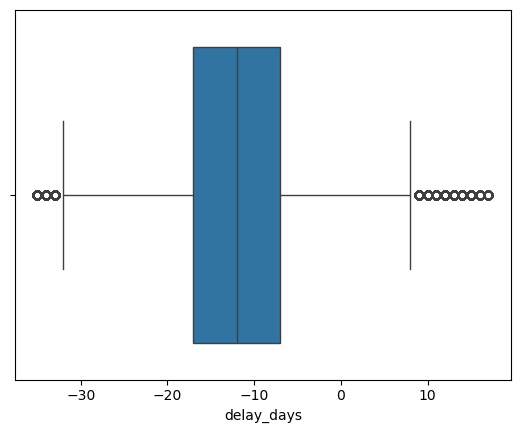

In [93]:
sns.boxplot(x=order_clean['delay_days'])

In [94]:
# Order_items Data Cleaning
order_items.shape, order_items['order_id'].nunique()

((112650, 7), 98666)

Clearly, we observe duplicate entries in the dataset, with 98,666 unique order IDs compared to a total of 112,650 rows. Upon inspection, all duplicated rows in the order_items table are identical across all columns. Therefore, we will remove these duplicated records. During this process, we will also clean and drop any unnecessary columns to streamline the dataset for further analysis.

In [95]:
order_items_clean = order_items.drop_duplicates(subset=['order_id','seller_id','price','freight_value'])

order_items_clean = (
    order_items_clean
    .drop_duplicates(subset='order_id', keep='first')
    [['order_id','seller_id','price','freight_value']])

In [96]:
# Order_payments Data Cleaning
# Percentage of order payment method
order_payments['payment_type'].value_counts(normalize=True)*100

payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64

Reference Note: A "boleto" most commonly refers to Boleto Bancário, a popular payment method in Brazil that uses a voucher with a barcode for transactions (Google)

In [97]:
print(f"Number of duplicated order_id in payments table: {order_payments['order_id'].duplicated().sum()}")

Number of duplicated order_id in payments table: 4446


When examining the payments table, we also found duplicate order IDs. Unlike the duplicates in the order_items table, the values here differ across rows, indicating that each record represents a separate payment transaction—often made through different methods or different values probably for different products. Therefore, we decided to aggregate the data by summing the payment values for each order_id and retaining the primary payment method associated with the order.

In [98]:
order_payments_clean = order_payments.groupby('order_id', as_index = False).agg(
    payment_value = ('payment_value', 'sum'),
    payment_type = ('payment_type', 'first')
)


<Axes: xlabel='review_score', ylabel='count'>

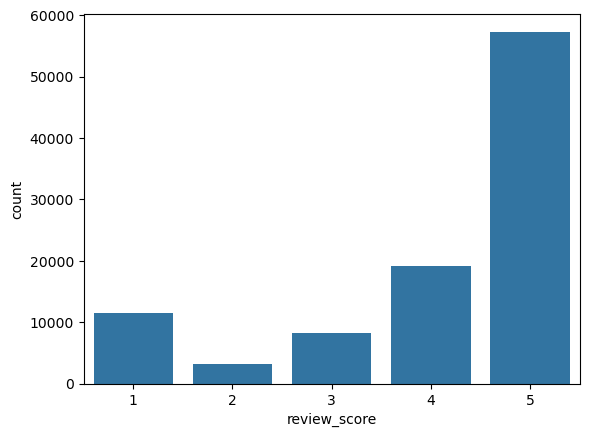

In [99]:
# Order_reviews Data Cleaning
sns.countplot(x = 'review_score', data = order_reviews)

In [100]:
order_reviews = order_reviews.drop(columns = ['review_comment_title','review_comment_message',
                                              'review_creation_date','review_answer_timestamp'])

In [101]:
# Merge data together
merged = order_clean.merge(customer, on = 'customer_id', how = 'left')
print(f"Customer merged: {merged['customer_zip_code_prefix'].notna().mean():.2%}")
merged = merged.merge(order_items_clean, on='order_id', how='left')
print(f"Order items merged: {merged['price'].notna().mean():.2%}")
merged = merged.merge(seller, on='seller_id', how='left')
print(f"Seller merged: {merged['seller_zip_code_prefix'].notna().mean():.2%}")
merged = merged.merge(order_payments_clean, on='order_id', how='left')
print(f"Order Payment merged: {merged['payment_value'].notna().mean():.2%}")
merged = merged.merge(order_reviews, on='order_id', how='left')
print(f"Review merged: {merged['review_score'].notna().mean():.2%}")
delivery_df = (merged.merge(geo_clean.add_prefix('customer_'),
                       left_on='customer_zip_code_prefix', right_on='customer_geolocation_zip_code_prefix', how='left')
          .merge(geo_clean.add_prefix('seller_'),
                 left_on='seller_zip_code_prefix', right_on='seller_geolocation_zip_code_prefix', how='left'))
print(f"Customer geo merge rate: {delivery_df['customer_geolocation_lat'].notna().mean():.2%}")
print(f"Seller geo merge rate: {delivery_df['seller_geolocation_lat'].notna().mean():.2%}")

Customer merged: 100.00%
Order items merged: 100.00%
Seller merged: 100.00%
Order Payment merged: 100.00%
Review merged: 99.37%
Customer geo merge rate: 99.73%
Seller geo merge rate: 99.77%


In [102]:
delivery_df.shape

(94942, 30)

# 3. Exploratory Data Analysis

- Gain intuition about the order patterns, logistic behaviors, and potential factors related to late delivery.

Text(0.5, 1.0, 'Proportion of Late Deliveries')

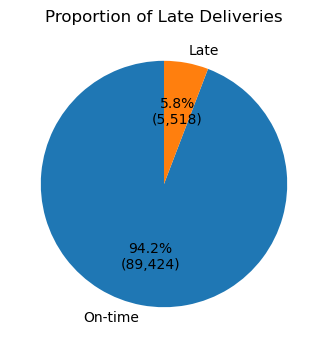

In [103]:
# Late delivery proportion
plt.figure(figsize=(4,4))
plt.pie(delivery_df['is_late'].value_counts(),
        autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct * sum(delivery_df['is_late'].value_counts())/100.0)):,})",
        startangle = 90,
        labels=['On-time','Late'])
plt.title('Proportion of Late Deliveries')

The pie chart shows that late deliveries account for ***5.8%*** of all orders, representing over ***5,510 packages***. This is a substantial portion that warrants focused efforts to improve delivery performance.

Text(0.5, 1.05, 'Delivery Time Distribution by Delivery Status')

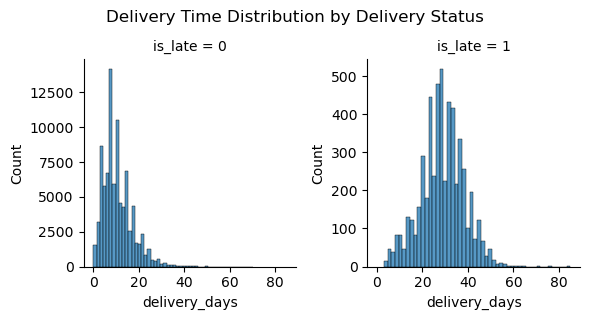

In [104]:
# Delivery and Price–Freight Patterns
g = sns.FacetGrid(data = delivery_df, col = 'is_late', sharey = False)
g.map(sns.histplot, 'delivery_days', bins = 50)
plt.suptitle('Delivery Time Distribution by Delivery Status', fontsize = 12, y = 1.05)

Text(0.5, 1.0, 'Freight vs Price')

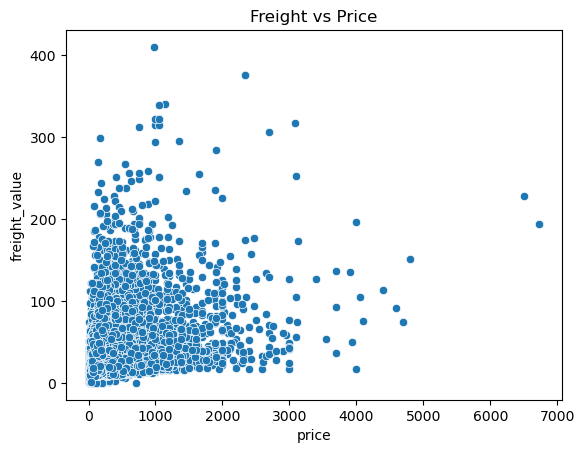

In [105]:
sns.scatterplot(data = delivery_df, x = 'price', y = 'freight_value')
plt.title('Freight vs Price')

The majority of orders show lower product prices accompanied by lower freight values. However, there are noticeable outliers, including extremely high freight values (above 400) and unusually high item prices (above 6,000). These outliers should be taken into consideration during further analysis.

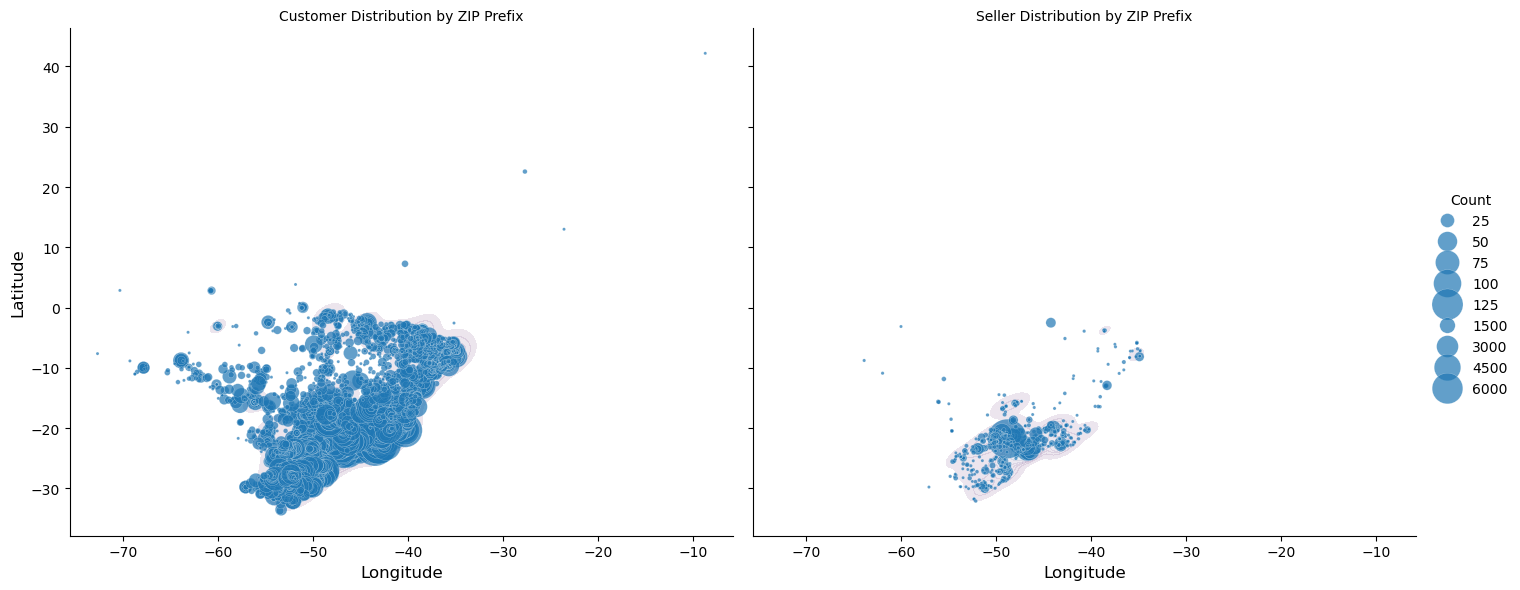

In [106]:
# 这个图感觉不是非常显著，要改一下感觉
customer_zip_counts = delivery_df.groupby('customer_zip_code_prefix').agg(
    count=('customer_zip_code_prefix', 'size'),
    lat=('customer_geolocation_lat', 'mean'),
    lng=('customer_geolocation_lng', 'mean')
).reset_index()
customer_zip_counts['role'] = 'Customer'

seller_zip_counts = delivery_df.groupby('seller_zip_code_prefix').agg(
    count=('seller_zip_code_prefix', 'size'),
    lat=('seller_geolocation_lat', 'first'),
    lng=('seller_geolocation_lng', 'first')
).reset_index()
seller_zip_counts['role'] = 'Seller'

customer_zip_counts = customer_zip_counts.rename(columns={'customer_zip_code_prefix': 'zip_prefix'})
seller_zip_counts = seller_zip_counts.rename(columns={'seller_zip_code_prefix': 'zip_prefix'})

zip_plot = pd.concat([customer_zip_counts, seller_zip_counts], axis=0).reset_index(drop=True)

g = sns.FacetGrid(data=zip_plot, col='role', height=6, aspect=1.2)

g.map_dataframe(sns.scatterplot, 'lng', 'lat', size='count',sizes=(5,800), alpha=0.7, zorder=2)
g.map_dataframe(sns.kdeplot,'lng','lat',fill=True,alpha=0.1,cmap='viridis',zorder=1)

g.set_titles('{col_name} Distribution by ZIP Prefix', fontsize=14)
g.set_axis_labels('Longitude', 'Latitude', fontsize=12)
g.add_legend(title='Count', fontsize=10, title_fontsize=12,markerscale=0.8)


From the Customer Distribution plot, we see that the dense cluster of large dots centers around longitude -50 to -40 and latitude -20 to -30, consistent with former analysis of customer state distribution. This is the core region where most transactions occur. The scattered outlier points can be regarded as geographic anomalies, which need investigation during data cleaning. The transculent KDE fill show the business covers a broad geographic range.
By comparing the two subplots, we can observe that the highest-density regions for customers and sellers largely overlap. However, some areas have dense customers but sparse sellers, increasing the risk of late deliveries.

#Remove Geographic Outliers

From former visualization, core region is longitude -50 to -40, latitude -30 to -20, we could expand slightly to include near-core areas but exclude extreme outliers

Original dataset size: 16963
Size after geographic bounds filter: 16806
Size after IQR outlier removal: 13221


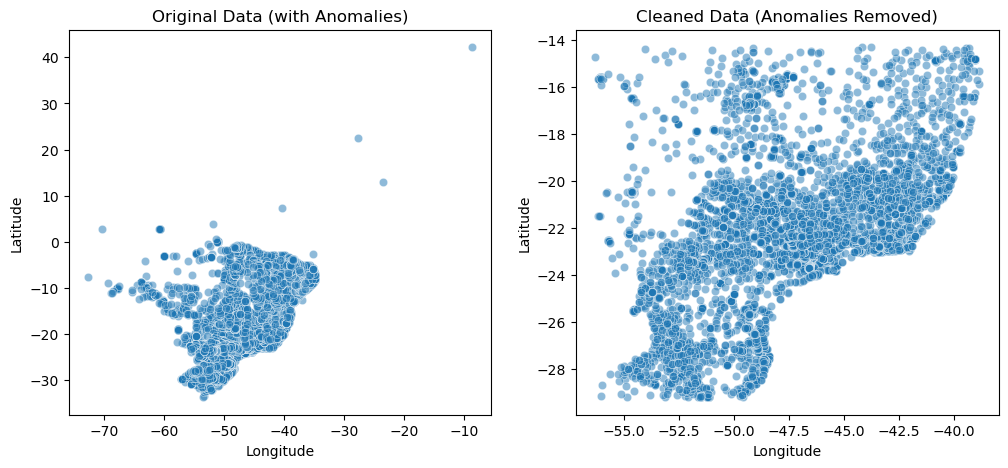

In [107]:
# Define valid geographic bounds
VALID_LNG_MIN = -75  # Brazil's westernmost longitude ~-74
VALID_LNG_MAX = -30  # Brazil's easternmost longitude ~-34
VALID_LAT_MIN = -35  # Brazil's southernmost latitude ~-34
VALID_LAT_MAX = 10   # Brazil's northernmost latitude ~5

print(f"Original dataset size: {len(zip_plot)}")

bounds_filtered = zip_plot[
    (zip_plot['lng'] >= VALID_LNG_MIN) &
    (zip_plot['lng'] <= VALID_LNG_MAX) &
    (zip_plot['lat'] >= VALID_LAT_MIN) &
    (zip_plot['lat'] <= VALID_LAT_MAX)
]

print(f"Size after geographic bounds filter: {len(bounds_filtered)}")

#remove interquanrtile outliers
def remove_iqr_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

iqr_filtered_lng = remove_iqr_outliers(bounds_filtered, 'lng')
iqr_filtered = remove_iqr_outliers(iqr_filtered_lng, 'lat')

print(f"Size after IQR outlier removal: {len(iqr_filtered)}")

plt.figure(figsize=(12, 5))

# Original data
plt.subplot(1, 2, 1)
sns.scatterplot(data=zip_plot, x='lng', y='lat', alpha=0.5)
plt.title('Original Data (with Anomalies)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Cleaned data
plt.subplot(1, 2, 2)
sns.scatterplot(data=iqr_filtered, x='lng', y='lat', alpha=0.5)
plt.title('Cleaned Data (Anomalies Removed)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


cleaned_zip_plot = iqr_filtered

In [108]:
# Geographic distance between sellers and customers
from math import radians, cos, sin, asin, sqrt

def haversine(lat1,lng1,lat2,lng2):
  lat1,lng1,lat2,lng2 = map(radians, [lat1,lng1,lat2,lng2])
  dlat = lat2-lat1
  dlng = lng2-lng1
  a = sin(dlat/2)**2+cos(lat1)*cos(lat2)*sin(dlng/2)**2
  c = 2 * asin(sqrt(a))
  r = 6371
  return c * r

delivery_df['seller_customer_distance'] = delivery_df.apply(
    lambda row: haversine(
        row['seller_geolocation_lat'],row['seller_geolocation_lng'],
        row['customer_geolocation_lat'],row['customer_geolocation_lng']
    ),
    axis=1
)

# 4. Statistical Significance Tests

- Use non-parametic and correltion tests to validate the question and establish statistical evidence for later modeling

Text(0, 0.5, 'Delivery Days')

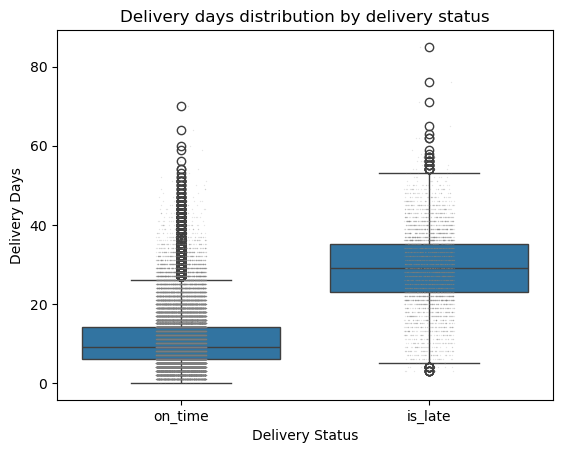

In [ ]:
# Model Basic Logic: Delivery Days with Late Delivery
# Whether the delivery days is related to late delivery as the fundation of the question

sns.boxplot(x='is_late',y='delivery_days',data=delivery_df)
plt.xticks([0,1],['on_time','is_late'])
sns.stripplot(data=delivery_df, x='is_late', y='delivery_days', 
              color='gray', alpha=0.2, size=1, jitter=True)
plt.title('Delivery days distribution by delivery status')
plt.xlabel('Delivery Status')
plt.ylabel('Delivery Days')

In [122]:
# Use Mann-Whitney U test
from scipy.stats import mannwhitneyu

late_delivery_days = delivery_df[delivery_df['is_late'] == 1]['delivery_days'].dropna()
ontime_delivery_days = delivery_df[delivery_df['is_late'] == 0]['delivery_days'].dropna()

u_stat, p_value = mannwhitneyu(late_delivery_days, ontime_delivery_days, alternative='two-sided')
print(f"Mann-Whitney U statistic: {u_stat:.2f}")
print(f"p-value: {p_value:.4f}")

Mann-Whitney U statistic: 462494509.00
p-value: 0.0000


With a p-value < 0.001, the difference in delivery days between late and on-time orders is statistically significant.
This result indicates a strong relationship between delivery duration and delivery status: late orders take considerably longer to deliver.
These findings confirm the fundamental logic of our delay prediction model: longer delivery durations are a key driver of late deliveries.

Text(0, 0.5, 'Delay')

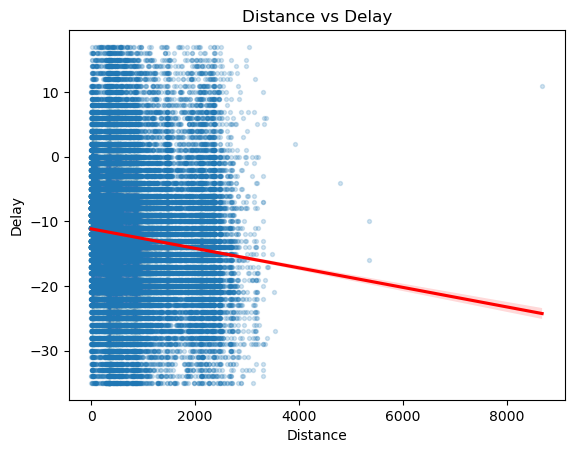

In [111]:
# Distance vs. Late delivery 
# Geographic distance between sellers and customers, and the delay days between estimated and actual delivery dates.

distance_delay_df = delivery_df[['seller_customer_distance', 'delay_days']]
sns.regplot(data=distance_delay_df, x='seller_customer_distance', y='delay_days',
            scatter_kws={'alpha':0.2, 's':8}, line_kws={'color':'red'})
plt.title('Distance vs Delay')
plt.xlabel('Distance')
plt.ylabel('Delay')

In [112]:
# Test the spatial significance
from scipy.stats import spearmanr

corr, p_value = spearmanr(distance_delay_df['seller_customer_distance'], distance_delay_df['delay_days'], nan_policy='omit')
print(f"Spearman's correlation coefficient: {corr:.2f}")
print(f"p-value: {p_value:.4f}")

Spearman's correlation coefficient: -0.19
p-value: 0.0000


Although intuitively one might expect that longer distances lead to greater delivery delays, the results show the opposite pattern — orders with shorter distances are more likely to experience delays. This is likely because shorter-distance orders are given tighter estimated delivery windows, making them more sensitive to factors such as traffic conditions or holidays. Therefore, the relationship between distance and delay days may reflect differences in estimation policy rather than actual geographic or logistical inefficiency.

With a p-value < 0.005, the correlation is statistically significant, confirming that the relationship is not random.
However, the correlation coefficient of –0.19 indicates that the negative relationship is weak in magnitude,
suggesting that distance plays only a limited role in explaining delivery delay variation.

Text(0.5, 1.0, 'Payment type vs. Delivery Lateness Correlation')

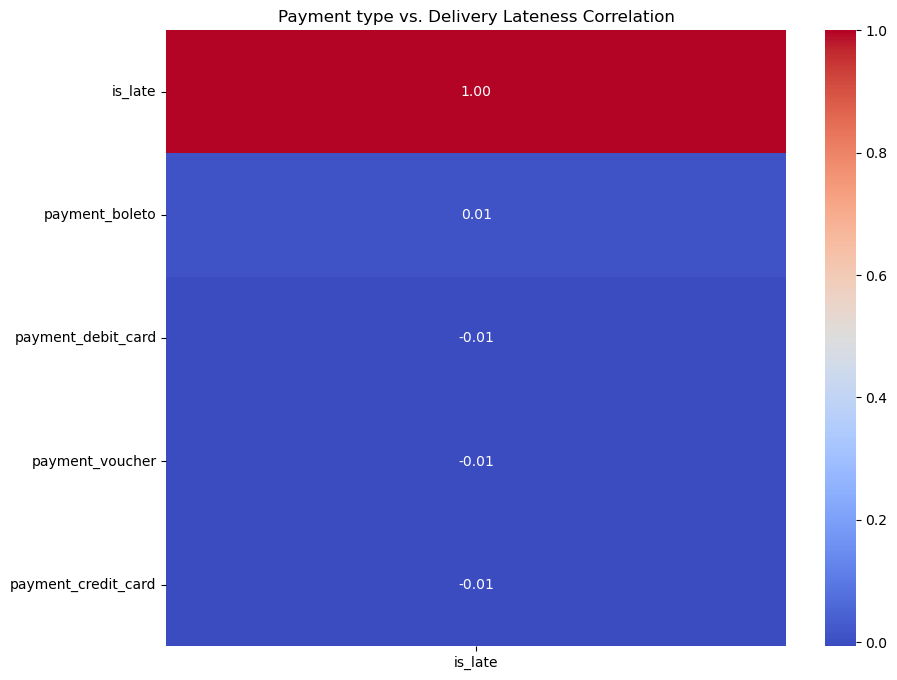

In [113]:
# payment vs is_late - heatmap
payment_encoded=pd.get_dummies(delivery_df['payment_type'],prefix='payment')
merged_payment=pd.concat([delivery_df[['is_late']],payment_encoded],axis=1)

payment_corr = merged_payment.corr()
plt.figure(figsize=(10,8))
sns.heatmap(
    payment_corr[['is_late']].sort_values('is_late',ascending=False),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Payment type vs. Delivery Lateness Correlation')

The correlation coefficients between payment-related variables and delivery delay status were all very close to zero,
indicating that payment method and lateness are virtually unrelated. This finding suggests that the initial assumption — that certain payment types might cause slower processing or delayed shipment — is not supported by the data.

Since there is no meaningful difference in distribution across payment methods, we did not perform further significance testing on this variable.

Text(0.5, 1.0, 'Review score distribution by delivery status')

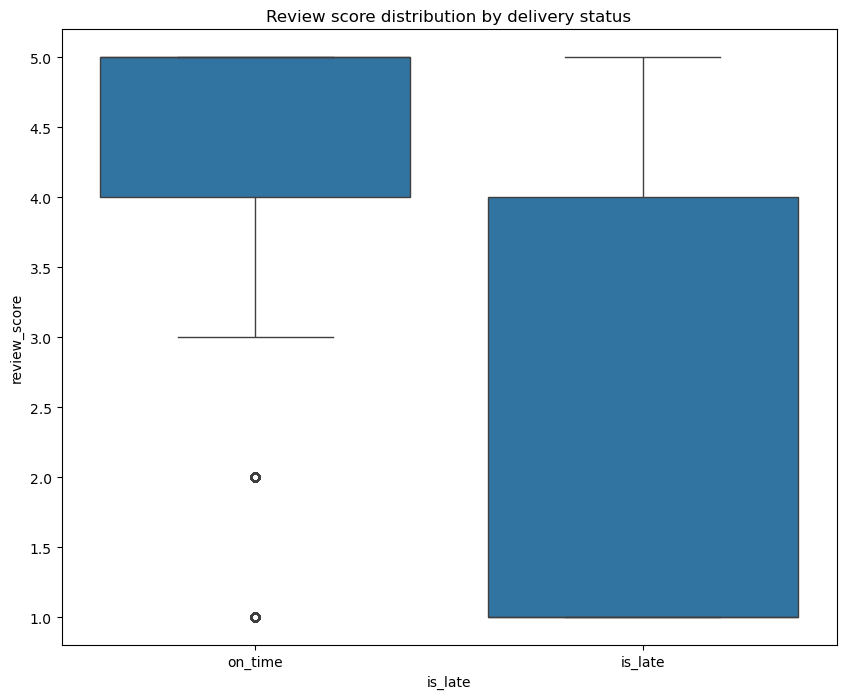

In [114]:
# Whether the delay days is related to customer satisfaction as the fundation of the question
plt.figure(figsize=(10,8))
sns.boxplot(x='is_late',y='review_score',data=delivery_df)
plt.xticks([0,1],['on_time','is_late'])
plt.title('Review score distribution by delivery status')


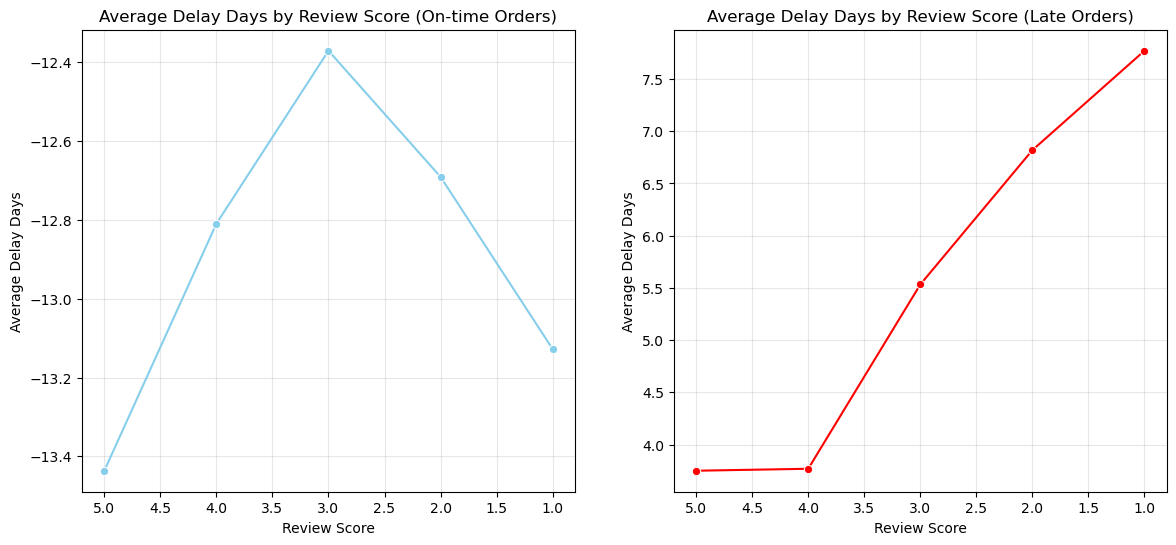

In [148]:
avg_delay = delivery_df.groupby(['is_late', 'review_score'])['delay_days'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=avg_delay[avg_delay['is_late'] == 0], x='review_score', y='delay_days', marker='o', color='skyblue', ax=axes[0])
axes[0].set_title('Average Delay Days by Review Score (On-time Orders)')
axes[0].set_xlabel('Review Score')
axes[0].set_ylabel('Average Delay Days')
axes[0].grid(True, alpha=0.3)
axes[0].invert_xaxis()


sns.lineplot(data=avg_delay[avg_delay['is_late'] == 1], x='review_score', y='delay_days', marker='o', color='red', ax=axes[1])
axes[1].set_title('Average Delay Days by Review Score (Late Orders)')
axes[1].set_xlabel('Review Score')
axes[1].set_ylabel('Average Delay Days')
axes[1].grid(True, alpha=0.3)
axes[1].invert_xaxis()


The boxplot clearly shows a significant difference between on-time and late orders in their review score distributions. On-time deliveries exhibit relatively high and stable review scores without a clear linear relationship with delivery days, suggesting that minor variations in delivery time do not strongly influence customer satisfaction. In contrast, late deliveries demonstrate a clear downward trend — as delivery delays increase, review scores decline sharply. This indicates that delay severity has a strong and consistent negative impact on customer satisfaction.

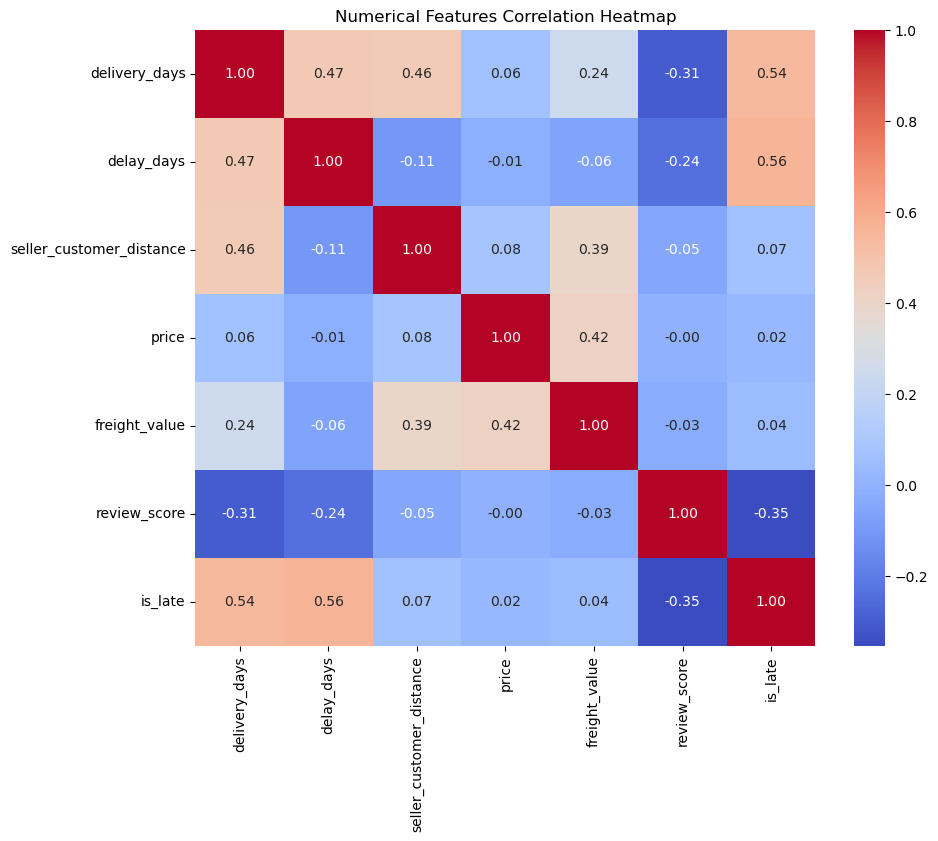

In [116]:

# Correlation Map
merged=merged.merge(
    delivery_df[['order_id', 'seller_customer_distance']],
    on='order_id',
    how='left'
)

num_features = ['delivery_days', 'delay_days', 'seller_customer_distance',
                'price', 'freight_value', 'review_score', 'is_late']
corr_df = delivery_df[num_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_df,annot=True,cmap='coolwarm',fmt='.2f',annot_kws={'size':10})
plt.title('Numerical Features Correlation Heatmap')
plt.show()